# Cycle Counts in Dublin City Centre (2023)

In this project, I examine a dataset published by Dublin City Council detailing the number of cyclists measured by totem counters at several locations in Dublin city centre (https://data.smartdublin.ie/dataset/dublin-city-centre-cycle-counts). Passing cyclists are counted and logged every hour, 24 hours per day, 7 days per week.

## Preliminary Data Exploration and Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("cycle-counts-1-jan-31-december-2023.csv")

# Display the first few rows
data.head()

,Time,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023),Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist West,Clontarf - James Larkin Rd Cyclist East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist West,Clontarf - Pebble Beach Carpark Cyclist East,...,Grove Road Totem OUT,Grove Road Totem IN,North Strand Rd N/B (Counter Removed for Roadworks) Cyclist,North Strand Rd S/B (Counter Removed for Roadworks) Cyclist,Richmond Street Inbound,Richmond Street Inbound Cyclist South,Richmond Street Inbound Cyclist North,Richmond Street Outbound,Richmond Street Outbound Cyclist North,Richmond Street Outbound Cyclist South
0,01/01/2023 00:00,1.0,0.0,1.0,1.0,1.0,0.0,5.0,3.0,2.0,...,6.0,6.0,0.0,NaN,2.0,0.0,2.0,8.0,0.0,8.0
1,01/01/2023 01:00,0.0,0.0,0.0,6.0,4.0,2.0,2.0,2.0,0.0,...,9.0,4.0,0.0,NaN,0.0,0.0,0.0,6.0,0.0,6.0
2,01/01/2023 02:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,4.0,5.0,0.0,NaN,3.0,0.0,3.0,9.0,0.0,9.0
3,01/01/2023 03:00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,7.0,5.0,0.0,NaN,4.0,1.0,3.0,8.0,0.0,8.0
4,01/01/2023 04:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,13.0,4.0,0.0,NaN,4.0,0.0,4.0,4.0,0.0,4.0


In [4]:
# Get general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 33 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Time                                                                                               8760 non-null   object 
 1   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)                3263 non-null   float64
 2   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist  3263 non-null   float64
 3   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist  3263 non-null   float64
 4   Clontarf - James Larkin Rd                                                                         8759 non-null   float

In [6]:
# Get statistical information
data.describe()

,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023),Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist West,Clontarf - James Larkin Rd Cyclist East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist West,Clontarf - Pebble Beach Carpark Cyclist East,Drumcondra Cyclists Inbound (Not On Site - Roadworks) Cyclist,...,Grove Road Totem OUT,Grove Road Totem IN,North Strand Rd N/B (Counter Removed for Roadworks) Cyclist,North Strand Rd S/B (Counter Removed for Roadworks) Cyclist,Richmond Street Inbound,Richmond Street Inbound Cyclist South,Richmond Street Inbound Cyclist North,Richmond Street Outbound,Richmond Street Outbound Cyclist North,Richmond Street Outbound Cyclist South
count,3263.00000,3263.000000,3263.000000,8759.000000,8759.000000,8759.000000,8745.000000,8745.000000,8745.000000,4766.000000,...,8759.000000,8759.000000,8759.0,0.0,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,12.29574,7.097763,5.197977,36.288275,17.798950,18.489325,51.263007,23.851229,27.411778,9.422577,...,48.419568,62.036534,0.0,NaN,52.205503,0.254938,51.950565,45.493435,0.254139,45.239297
std,17.25253,13.193925,7.747670,40.601238,20.770857,23.076030,57.365567,28.622634,33.762518,14.943510,...,58.612451,87.417815,0.0,NaN,44.149151,0.538506,44.012794,44.498050,0.552588,44.341824
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1.000000,0.000000,3.000000,2.000000,1.000000,5.000000,2.000000,3.000000,1.000000,...,12.000000,11.000000,0.0,NaN,11.000000,0.000000,11.000000,11.000000,0.000000,11.000000
50%,7.00000,4.000000,3.000000,23.000000,10.000000,10.000000,33.000000,14.000000,15.000000,5.000000,...,32.000000,43.000000,0.0,NaN,51.000000,0.000000,51.000000,36.000000,0.000000,35.000000
75%,15.00000,8.000000,7.000000,56.000000,27.000000,27.000000,78.000000,35.000000,38.000000,11.000000,...,58.000000,70.000000,0.0,NaN,78.000000,0.000000,77.500000,63.000000,0.000000,63.000000
max,159.00000,140.000000,71.000000,301.000000,145.000000,159.000000,413.000000,200.000000,269.000000,142.000000,...,406.000000,689.000000,0.0,NaN,278.000000,4.000000,277.000000,309.000000,5.000000,308.000000


These preliminary explorations reveal that the dataset contains columns corresponding to eleven distinct locations in the city. However, no counts are recorded for the North Strand Rd location as the counter was removed for roadworks (as noted in the header). Similarly, no data is recorded for the Drumcondra outbound location.

These preliminary explorations of the dataset reveal:

* The dataset contains data corresponding to 11 counting totems
* No counts are recorded for North Strand Rd. The header of these columns notes that the totem was removed for roadworks.
* No counts are recorded for Drumconcdra Outbound
* No counts are recorded for Charleville Mall after mid-August

The following totems are located next to two-way cycle lanes:

* Charleville Mall
* Clontarf - James Larkin Rd
* Clontarf - Pebble Beach Carpark
* Grove Rd

The follow totems are located next to one-way cycle lanes, meaning signficant numbers are counted in one direction only:

* Drumcondra Inbound
* Griffith Ave (Clare Rd)
* Griffith Ave (Lane)
* Richmond Street Inbound
* Richmond Street Outbound

In [10]:
# Remove the empty columns for Drumcondra Outbound and North Strand Rd
data = data.drop(data.columns[[13, 14, 15, 25, 26]], axis=1)

There are three columns for each of the remaining locations. The first column gives the total hourly cyclist count, while the second and third columns provide a directional breakdown. Most of these totems are located next to two-way cycle lanes (e.g. Charleville Mall, Clontarf - James Larkin Rd), but those located at Drumcondra, Griffith Avenue, and Richmond Street are adjacent to uni-directional lanes. For these locations significant traffic is counted in only direction, as cyclists heading in the opposite direction are not using the lane as intended. Hence, we can consider there to be the following locations:

* Charleville Mall (North/inbound & South/outbound)
* Clontarf - Larkin Rd (West/inbound & East/outbound)
* Clontarf - Pebble Beach Carpark (West/inbound & East/outbound)
* Drumcondra (South/inbound only)
* Griffith Avenue (Clare Rd/ ...
* Richmond Street (North/inbound & South/outbound)

In [13]:
# Check the remaning columns for missing values
data.isnull().sum()

Time                                                                                                    0
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)                  5497
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist    5497
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist    5497
Clontarf - James Larkin Rd                                                                              1
Clontarf - James Larkin Rd Cyclist West                                                                 1
Clontarf - James Larkin Rd Cyclist East                                                                 1
Clontarf - Pebble Beach Carpark                                                                        15
Clontarf - Pebble Beach Carpark Cyclist West                                                           15
Clontarf - Pebble Beach Carpark Cyclist East  

We find that there is a single empty row in all datasets. Manual investigation of the file reveals that this occured on 26th March (row 2017) and was due to the end of daylight saving time.

## Convert Time Columns

In [17]:
# Convert 'Time' to datetime
data['Time'] = pd.to_datetime(data['Time'], format='%d/%m/%Y %H:%M')

# Extract useful time-based features
data['year'] = data['Time'].dt.year
data['month'] = data['Time'].dt.month
data['day'] = data['Time'].dt.day
data['day_of_week'] = data['Time'].dt.dayofweek  # 0=Monday, 6=Sunday
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
data['hour'] = data['Time'].dt.hour

## Explore Numerical and Categorical Features

We can now begin to visualise the dataset, taking the Grove Road totem data as an example.

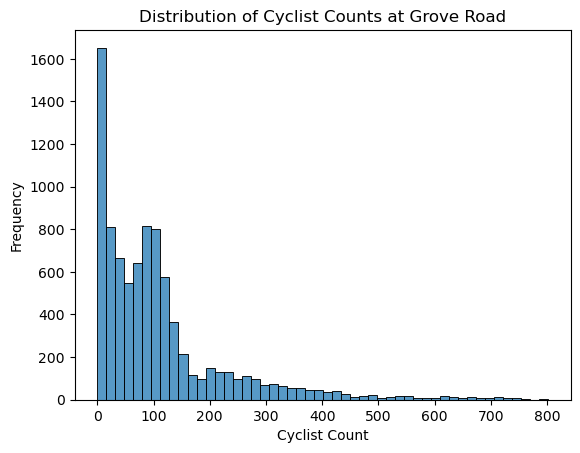

In [21]:
# Histogram of cyclist counts at Grove Road
sns.histplot(data['Grove Road Totem'], bins=50)
plt.title('Distribution of Cyclist Counts at Grove Road')
plt.xlabel('Cyclist Count')
plt.ylabel('Frequency')
plt.show()

Unsurprisingly, we find that the most common hourly number of cyclists corresponds to the lowest bin, reflecting very low counts in the early hours of the morning. 

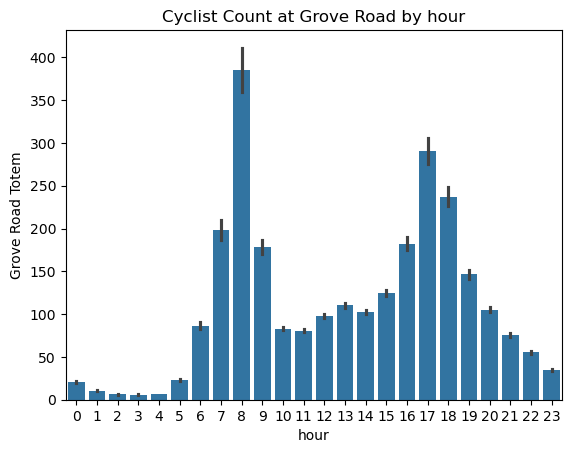

In [24]:
sns.barplot(x='hour', y='Grove Road Totem', data=data)
plt.title('Cyclist Count at Grove Road by hour')
plt.show()

This barplot of cyclist counts by hour reveals clear usage patterns. There are two distinct peaks at 8am and 5pm corresponding to the movement of commuters to and from work. 

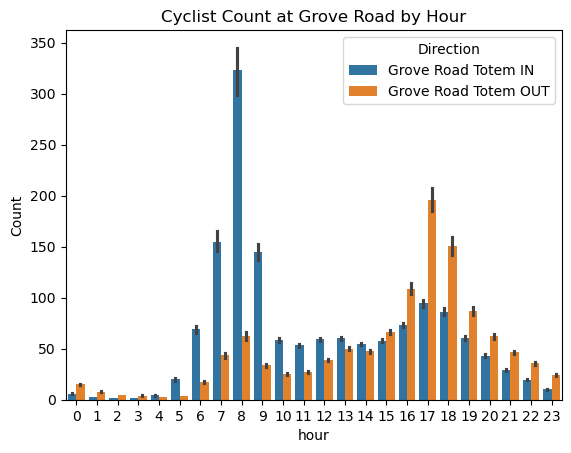

In [31]:
# Transform the Grove Road data from wide format to long format using the 'melt' function
grove_road = data.melt(id_vars='hour', # Retain the 'hour' column as an identifier
                       value_vars=['Grove Road Totem IN', 'Grove Road Totem OUT'], # Columns to reshape into rows
                       var_name='Direction', # New column to store the names of the melted columns
                       value_name='Count') # New column to store the values from the melted columns

# Create a grouped bar plot
sns.barplot(x='hour', y='Count', hue='Direction', data=grove_road)
plt.title("Cyclist Count at Grove Road by Hour")
plt.show()

Here we can clearly see the commuter patterns, with the majority of commuters travelling inbound in the morning and outbound in the evening. However, there are peaks at 8am and 5pm in both directions, demonstrating commuter behaviour in the opposite direction.

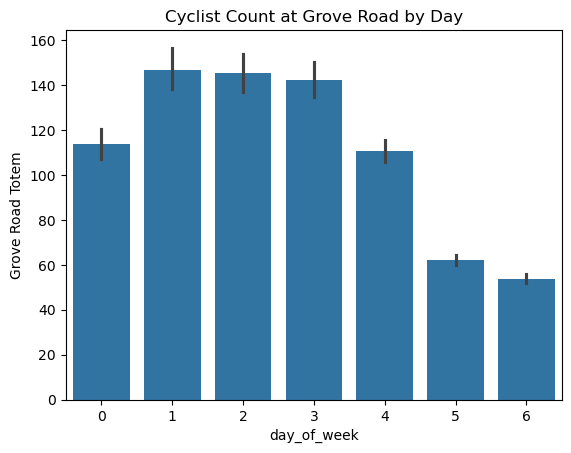

In [39]:
sns.barplot(x='day_of_week', y='Grove Road Totem', data=data)
plt.title('Cyclist Count at Grove Road by Day')
plt.show()

The highest number of cyclists are recorded on the midweek days Tuesday, Wednesday, and Thursday, with slightly lower numbers recorded on Monday and Friday. This represents a common hybrid work schedule, with many peeople working from home on Mondays and Fridays. There is a marked decrease in cyclists on Saturdays and Sundays.

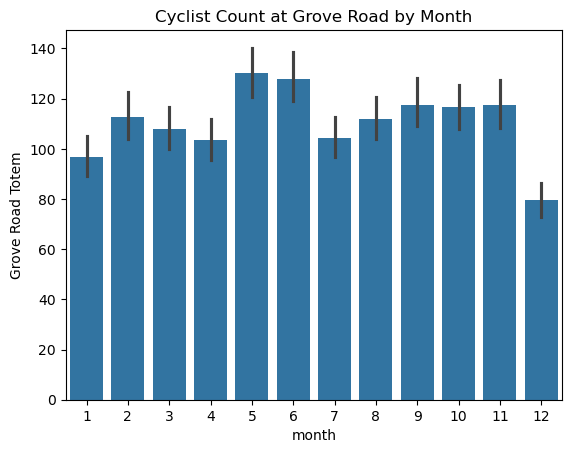

In [36]:
sns.barplot(x='month', y='Grove Road Totem', data=data)
plt.title('Cyclist Count at Grove Road by Month')
plt.show()

The trends here are less obvious. The lowest numbers are recorded in December, possibly due to the greater number of holidays from work and school/college as well as the typically cold weather at this time of year. Conversely, the highest number of cyclists are recorded in May and June, likely due to better weather conditions.

# Weather Data

Next, we will explore the relationship between cyclist counts and the weather. A dataset containing hourly data from a weather station in Phoenix Park was downloaded from the website of Met Éireann (https://www.met.ie/climate/available-data/historical-data). 

In [102]:
weather = pd.read_csv("hly175.csv", skiprows=15, low_memory=False)

weather.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl
0,16/08/2003 01:00,0,0,0,9.2,0,8.9,8.5,11.1,95,1021.9
1,16/08/2003 02:00,0,0,0,9,0,8.7,8.5,11.1,96,1021.7
2,16/08/2003 03:00,0,0,0,8.2,0,8,7.7,10.5,96,1021.2
3,16/08/2003 04:00,0,0,0,8.4,0,8.1,7.9,10.7,97,1021.2
4,16/08/2003 05:00,0,0,0,7.7,0,7.5,7.3,10.2,97,1021.1


We are interested in the following columns:

* rain - precipitation amount (mm)
* temp - air temperature (C)
* wetb - wet bulb temperature (C)
* rhum - relative humidity (%)

In [104]:
# Drop unrequired columns
weather = weather.drop(weather.columns[[1, 3, 5, 7, 8, 10]], axis=1)

In [106]:
weather.head()

,date,rain,temp,wetb,rhum
0,16/08/2003 01:00,0,9.2,8.9,95
1,16/08/2003 02:00,0,9,8.7,96
2,16/08/2003 03:00,0,8.2,8,96
3,16/08/2003 04:00,0,8.4,8.1,97
4,16/08/2003 05:00,0,7.7,7.5,97


In [110]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185952 entries, 0 to 185951
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    185952 non-null  object
 1   rain    185952 non-null  object
 2   temp    185952 non-null  object
 3   wetb    185952 non-null  object
 4   rhum    185952 non-null  object
dtypes: object(5)
memory usage: 7.1+ MB


In [112]:
# Convert 'date' to datetime
weather['date'] = pd.to_datetime(weather['date'], format='%d/%m/%Y %H:%M')

# Extract useful time-based features
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
weather['day'] = weather['date'].dt.day
weather['day_of_week'] = weather['date'].dt.dayofweek  # 0=Monday, 6=Sunday
weather['is_weekend'] = weather['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
weather['hour'] = weather['date'].dt.hour

In [116]:
# Convert rain, temp, wetb and rhum columns to numeric type

weather['rain'] = pd.to_numeric(weather['rain'], errors='coerce')
weather['temp'] = pd.to_numeric(weather['temp'], errors='coerce')
weather['wetb'] = pd.to_numeric(weather['wetb'], errors='coerce')
weather['rhum'] = pd.to_numeric(weather['rhum'], errors='coerce')

In [118]:
# Create a new dataframe containing only the 2023 weather data

weather2023 = weather[weather['year'] == 2023]

In [120]:
weather2023.head()

,date,rain,temp,wetb,rhum,year,month,day,day_of_week,is_weekend,hour
169871,2023-01-01 00:00:00,0.3,6.8,6.2,91.0,2023,1,1,6,1,0
169872,2023-01-01 01:00:00,0.0,6.2,5.3,86.0,2023,1,1,6,1,1
169873,2023-01-01 02:00:00,0.0,4.5,3.9,91.0,2023,1,1,6,1,2
169874,2023-01-01 03:00:00,0.1,4.0,3.6,93.0,2023,1,1,6,1,3
169875,2023-01-01 04:00:00,0.0,2.5,2.3,96.0,2023,1,1,6,1,4


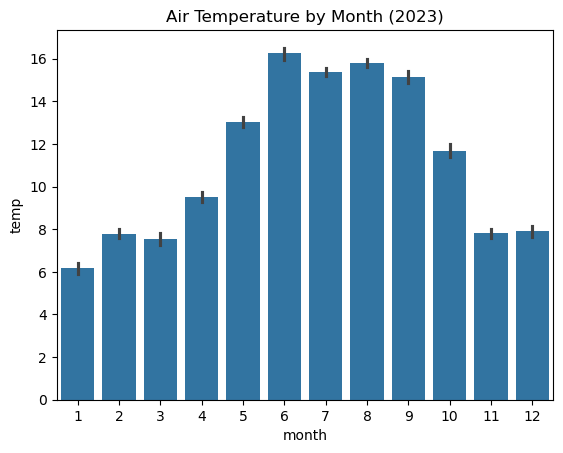

In [128]:
# Barplot of air temperature measurements by month
sns.barplot(x='month', y='temp', data=weather2023)
plt.title('Air Temperature by Month (2023)')
plt.show()

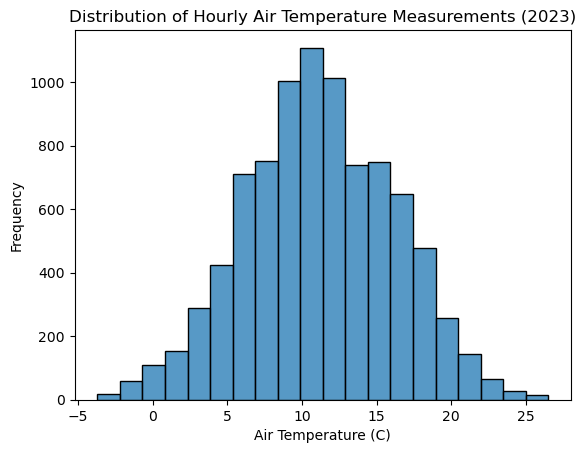

In [126]:
# Histogram of air temperature measurements
sns.histplot(weather2023['temp'], bins=20)
plt.title('Distribution of Hourly Air Temperature Measurements (2023)')
plt.xlabel('Air Temperature (C)')
plt.ylabel('Frequency')
plt.show()

# Investigation of the Relationship between Cyclist Count and Weather

In [134]:
merged_data = pd.merge(data, weather, on=['year', 'month', 'day', 'day_of_week', 'is_weekend', 'hour'], how='inner')

In [136]:
merged_data.head()

,Time,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023),Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist West,Clontarf - James Larkin Rd Cyclist East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist West,Clontarf - Pebble Beach Carpark Cyclist East,...,month,day,day_of_week,is_weekend,hour,date,rain,temp,wetb,rhum
0,2023-01-01 00:00:00,1.0,0.0,1.0,1.0,1.0,0.0,5.0,3.0,2.0,...,1,1,6,1,0,2023-01-01 00:00:00,0.3,6.8,6.2,91.0
1,2023-01-01 01:00:00,0.0,0.0,0.0,6.0,4.0,2.0,2.0,2.0,0.0,...,1,1,6,1,1,2023-01-01 01:00:00,0.0,6.2,5.3,86.0
2,2023-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,1,1,6,1,2,2023-01-01 02:00:00,0.0,4.5,3.9,91.0
3,2023-01-01 03:00:00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1,6,1,3,2023-01-01 03:00:00,0.1,4.0,3.6,93.0
4,2023-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1,1,6,1,4,2023-01-01 04:00:00,0.0,2.5,2.3,96.0


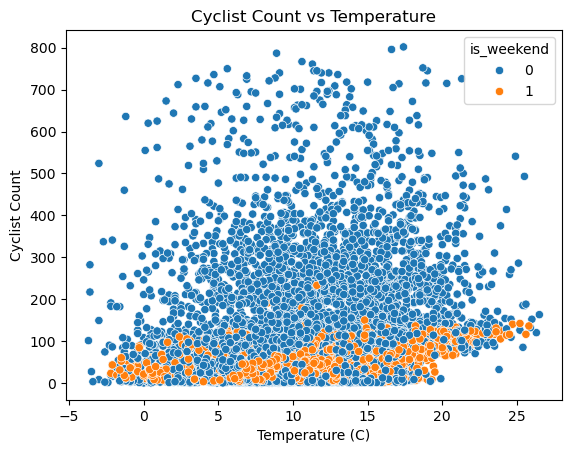

In [144]:
sns.scatterplot(x='temp', y='Grove Road Totem', hue='is_weekend', data=merged_data)
plt.title('Cyclist Count vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Cyclist Count')
plt.show()

In [146]:
# Filter data - only entries for 8am
filtered_data = merged_data[merged_data['hour'] == 8]

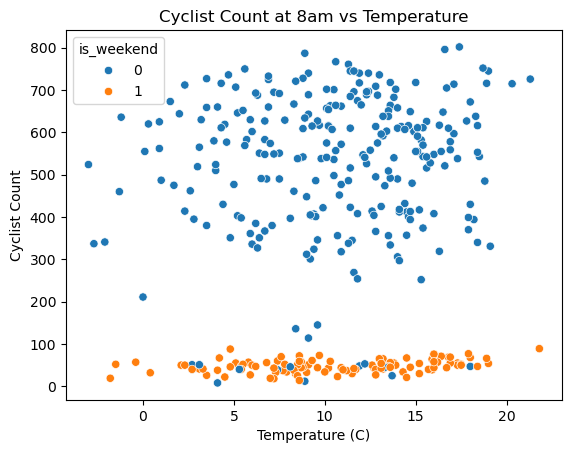

In [148]:
sns.scatterplot(x='temp', y='Grove Road Totem', hue='is_weekend', data=filtered_data)
plt.title('Cyclist Count at 8am vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Cyclist Count')
plt.show()

The cyclist count at Grove Road appears to be largely unaffected by temperature.

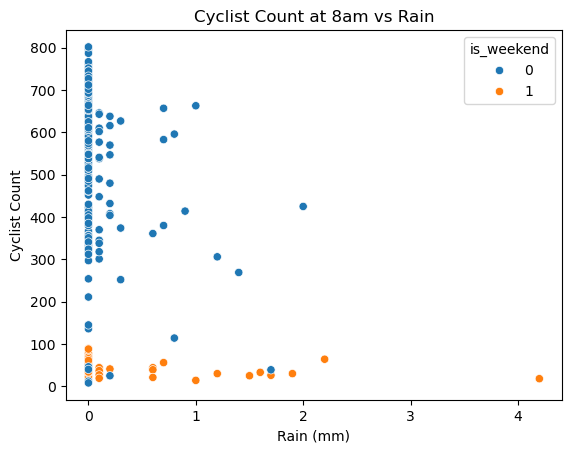

In [151]:
sns.scatterplot(x='rain', y='Grove Road Totem', hue='is_weekend', data=filtered_data)
plt.title('Cyclist Count at 8am vs Rain')
plt.xlabel('Rain (mm)')
plt.ylabel('Cyclist Count')
plt.show()

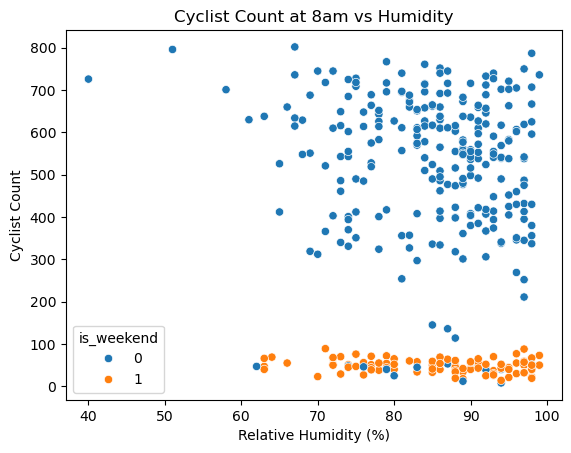

In [153]:
sns.scatterplot(x='rhum', y='Grove Road Totem', hue='is_weekend', data=filtered_data)
plt.title('Cyclist Count at 8am vs Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Cyclist Count')
plt.show()

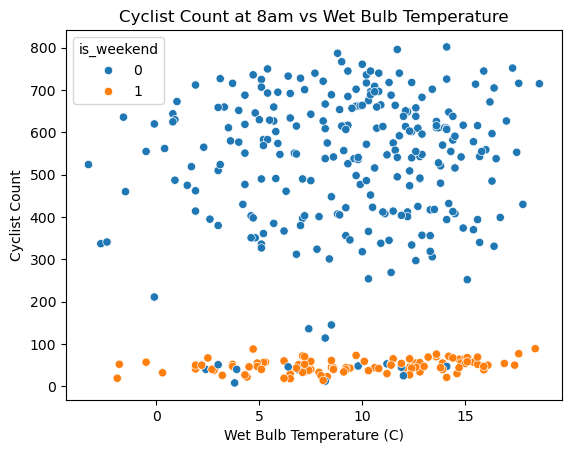

In [155]:
sns.scatterplot(x='wetb', y='Grove Road Totem', hue='is_weekend', data=filtered_data)
plt.title('Cyclist Count at 8am vs Wet Bulb Temperature')
plt.xlabel('Wet Bulb Temperature (C)')
plt.ylabel('Cyclist Count')
plt.show()

In [158]:
# Filter data - only entries for 8am
weekend_data = merged_data[(merged_data['is_weekend'] == 1) & (merged_data[]

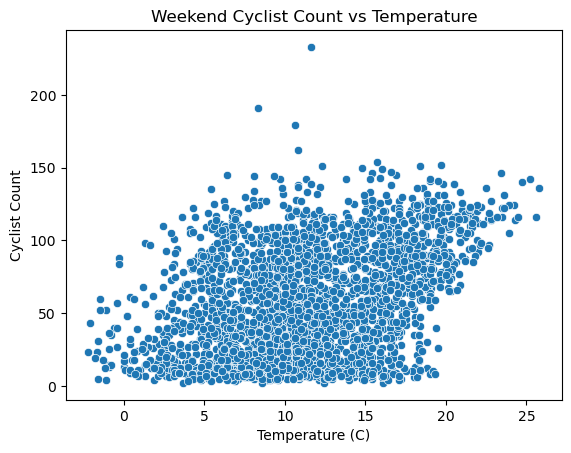

In [160]:
sns.scatterplot(x='temp', y='Grove Road Totem', data=weekend_data)
plt.title('Weekend Cyclist Count vs Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Cyclist Count')
plt.show()